# Customer Churn Analysis
# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,StratifiedKFold
!pip install scikit-plot
!pip install mlrose
import scikitplot as skplt
import sys
import six
sys.modules['sklearn.externals.six']=six
import mlrose
from yellowbrick.classifier.rocauc import roc_auc

In [2]:
#!pip install kmeans-smote

In [3]:
from kmeans_smote import KMeansSMOTE
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
!pip install pyfiglet
import pyfiglet

     |████████████████████████████████| 865 kB 5.0 MB/s 


In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
data=pd.read_csv('C:/Users/Jeet Sarkar/Data Science PG Program/Telecom_customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**There is no missing values**

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


*From describe i can see the distribution of continous features*

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*We have only three colums that are numerical rest of the columns are object*

In [10]:
data.drop(['customerID'],axis=1,inplace=True)

*Droping this column it is not important for eda as well as model building because it is just having unique id values*

In [11]:
data1=data.select_dtypes(include='object')

*Selection all the object columns so i can perform eda on that*

In [12]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce',downcast='float')

*Now this totalcharges was having the str values of there was the some emply space so i am converting all these str value and empty space values with nan*

# Univariate Analysis

In [13]:
col=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

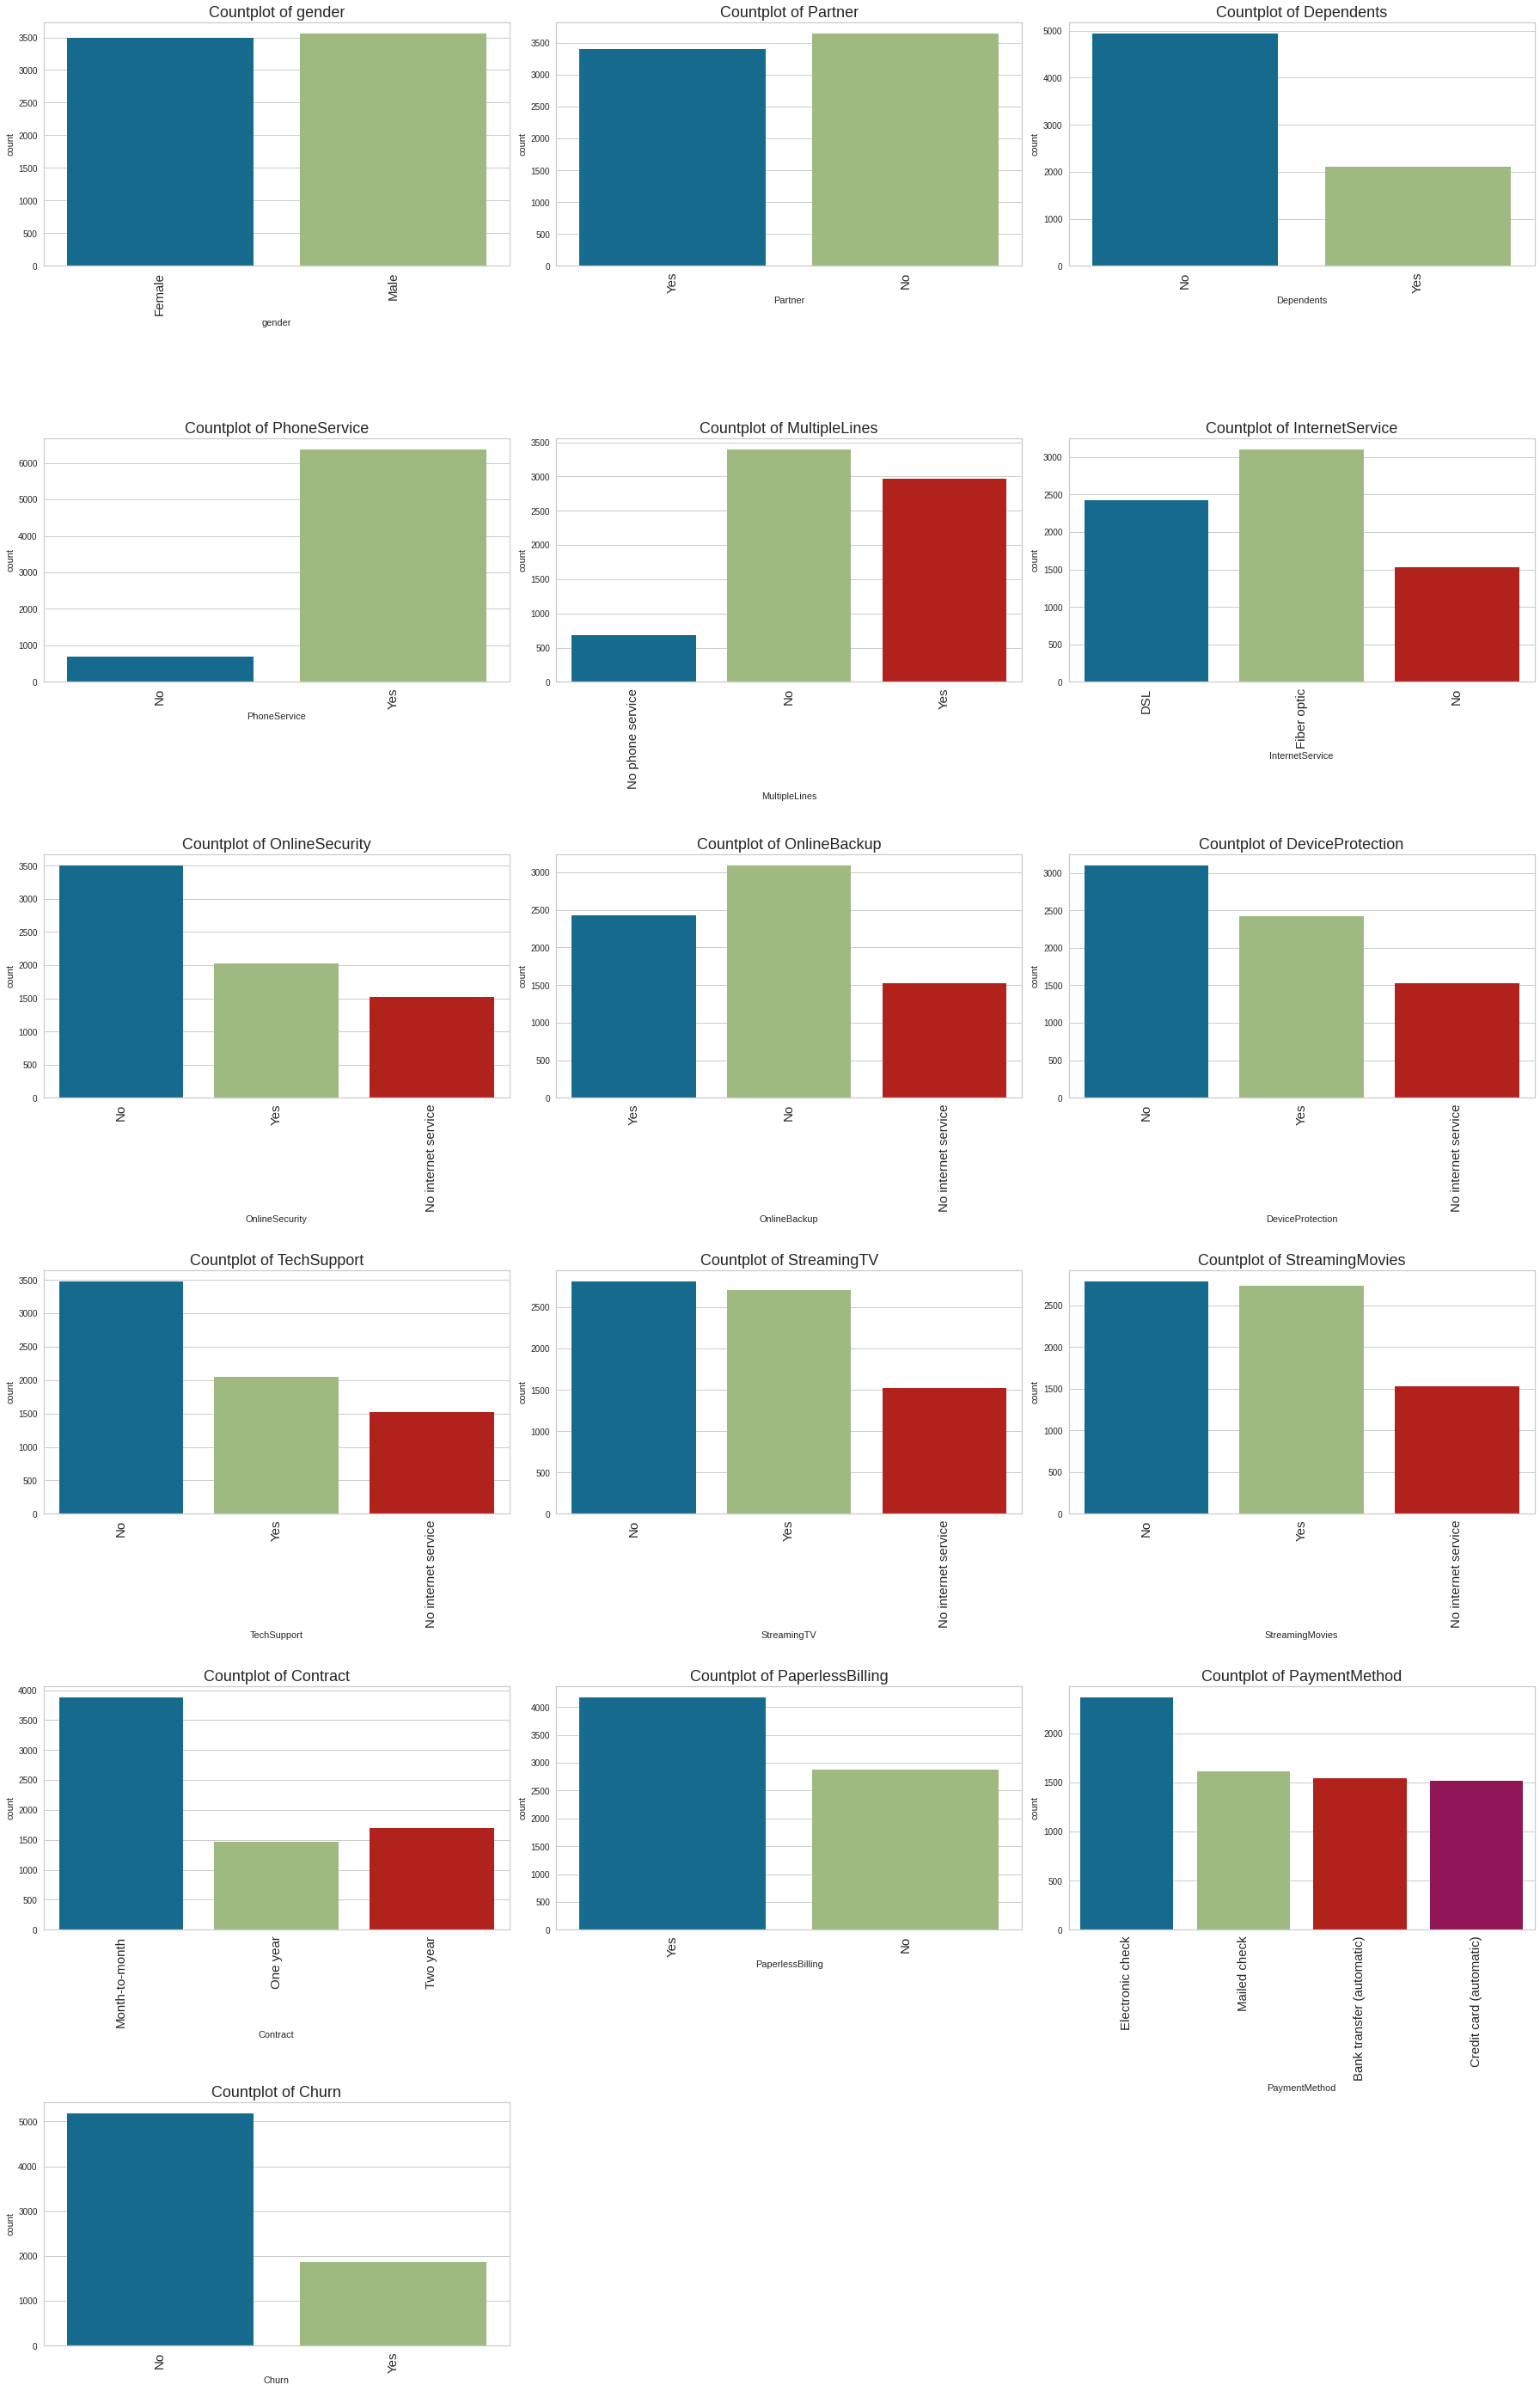

In [14]:
plt.figure(figsize=(25,65))
for i in range(len(col)):
  plt.subplot(10,3,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

# Obseravtion
1-From gender the male has more count as compare to female

2-From Partner yes has less count no has least count

3-Dependence has high no count and yes has less count

4-From phoneservice i can say no has less count and yes has high count

5-From multipleline i can say no phone service has least count after that yes has second least count and no has the high count

6-From internet service no has least count after that DLS has least count and fiber optics has the high count

7-From onlinesecurity no has high count and no internet service has the least count

8-From onlinebackup No has high count No internet service has least count and Yes has second least count

9-From device protection i can say no has high count No. internet service has least count

10-From techsupport i can say No has high count and no internet service has very least count and yes has second least count

11-From streamingtv and streaming movies i can say no has high count and no internet service has very least count

12-From contract i can say month to month has high count means month to month contract is more popular and one year has least count and second least count has two year

13-From PaperlessBilling i can say Yes has more count means people use to take paperless billing and no has least count

14-From paymentmethod i can say Electronic check has high count means people use electriccheck method more as compare to to others

15-From Churn No has high count and yes has less count means most of the people are not interested. 

# Univariate analysis for continuous columns

Text(0.5, 1.0, 'Distribution plot of Totalcharges')

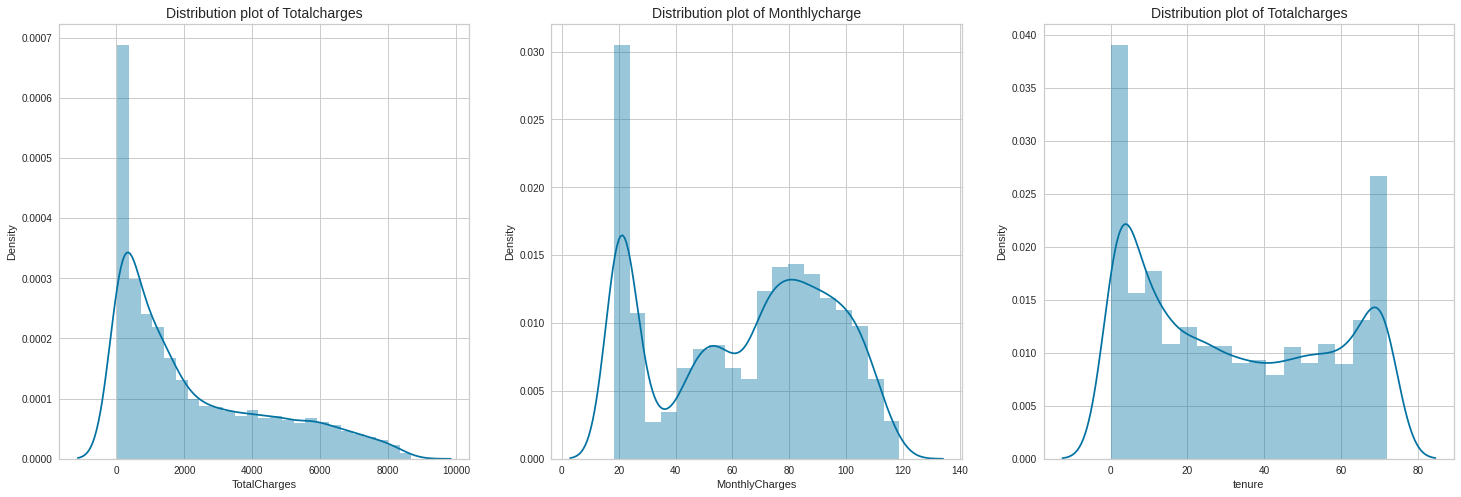

In [15]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
sns.distplot(data['TotalCharges'])
plt.title("Distribution plot of Totalcharges",fontsize=14)
plt.subplot(1,3,2)
sns.distplot(data['MonthlyCharges'])
plt.title("Distribution plot of Monthlycharge",fontsize=14)
plt.subplot(1,3,3)
sns.distplot(data['tenure'])
plt.title("Distribution plot of Totalcharges",fontsize=14)

# Total Charges
1-Data is positively skewed

2-Majority of the population spent close to $1,100 dollars

3-Customer have spent upto $8000 dollars

# MonthlyCharges
1-It is not normal distributed

2-most of the people spend 18-24 $. must be the service charge for basic service. majority of customer are subscribed to basic package

3-Between 70-100 dollar there are quite no. of customers

# Tenure

1-It is Bi-Model distriuted having 2 peak which means data is concentrated across two different group

2-We have a major chunk of customers in 0-1 month period. lot of them might be customers who tried the service and left or liked the service and continue

3-Betwenn 10-65 months we can see flat distribution of data

4-There are lot of customers in 69-72 months range.They are the royal customers

# Bivariate Analysis

In [16]:
col1=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

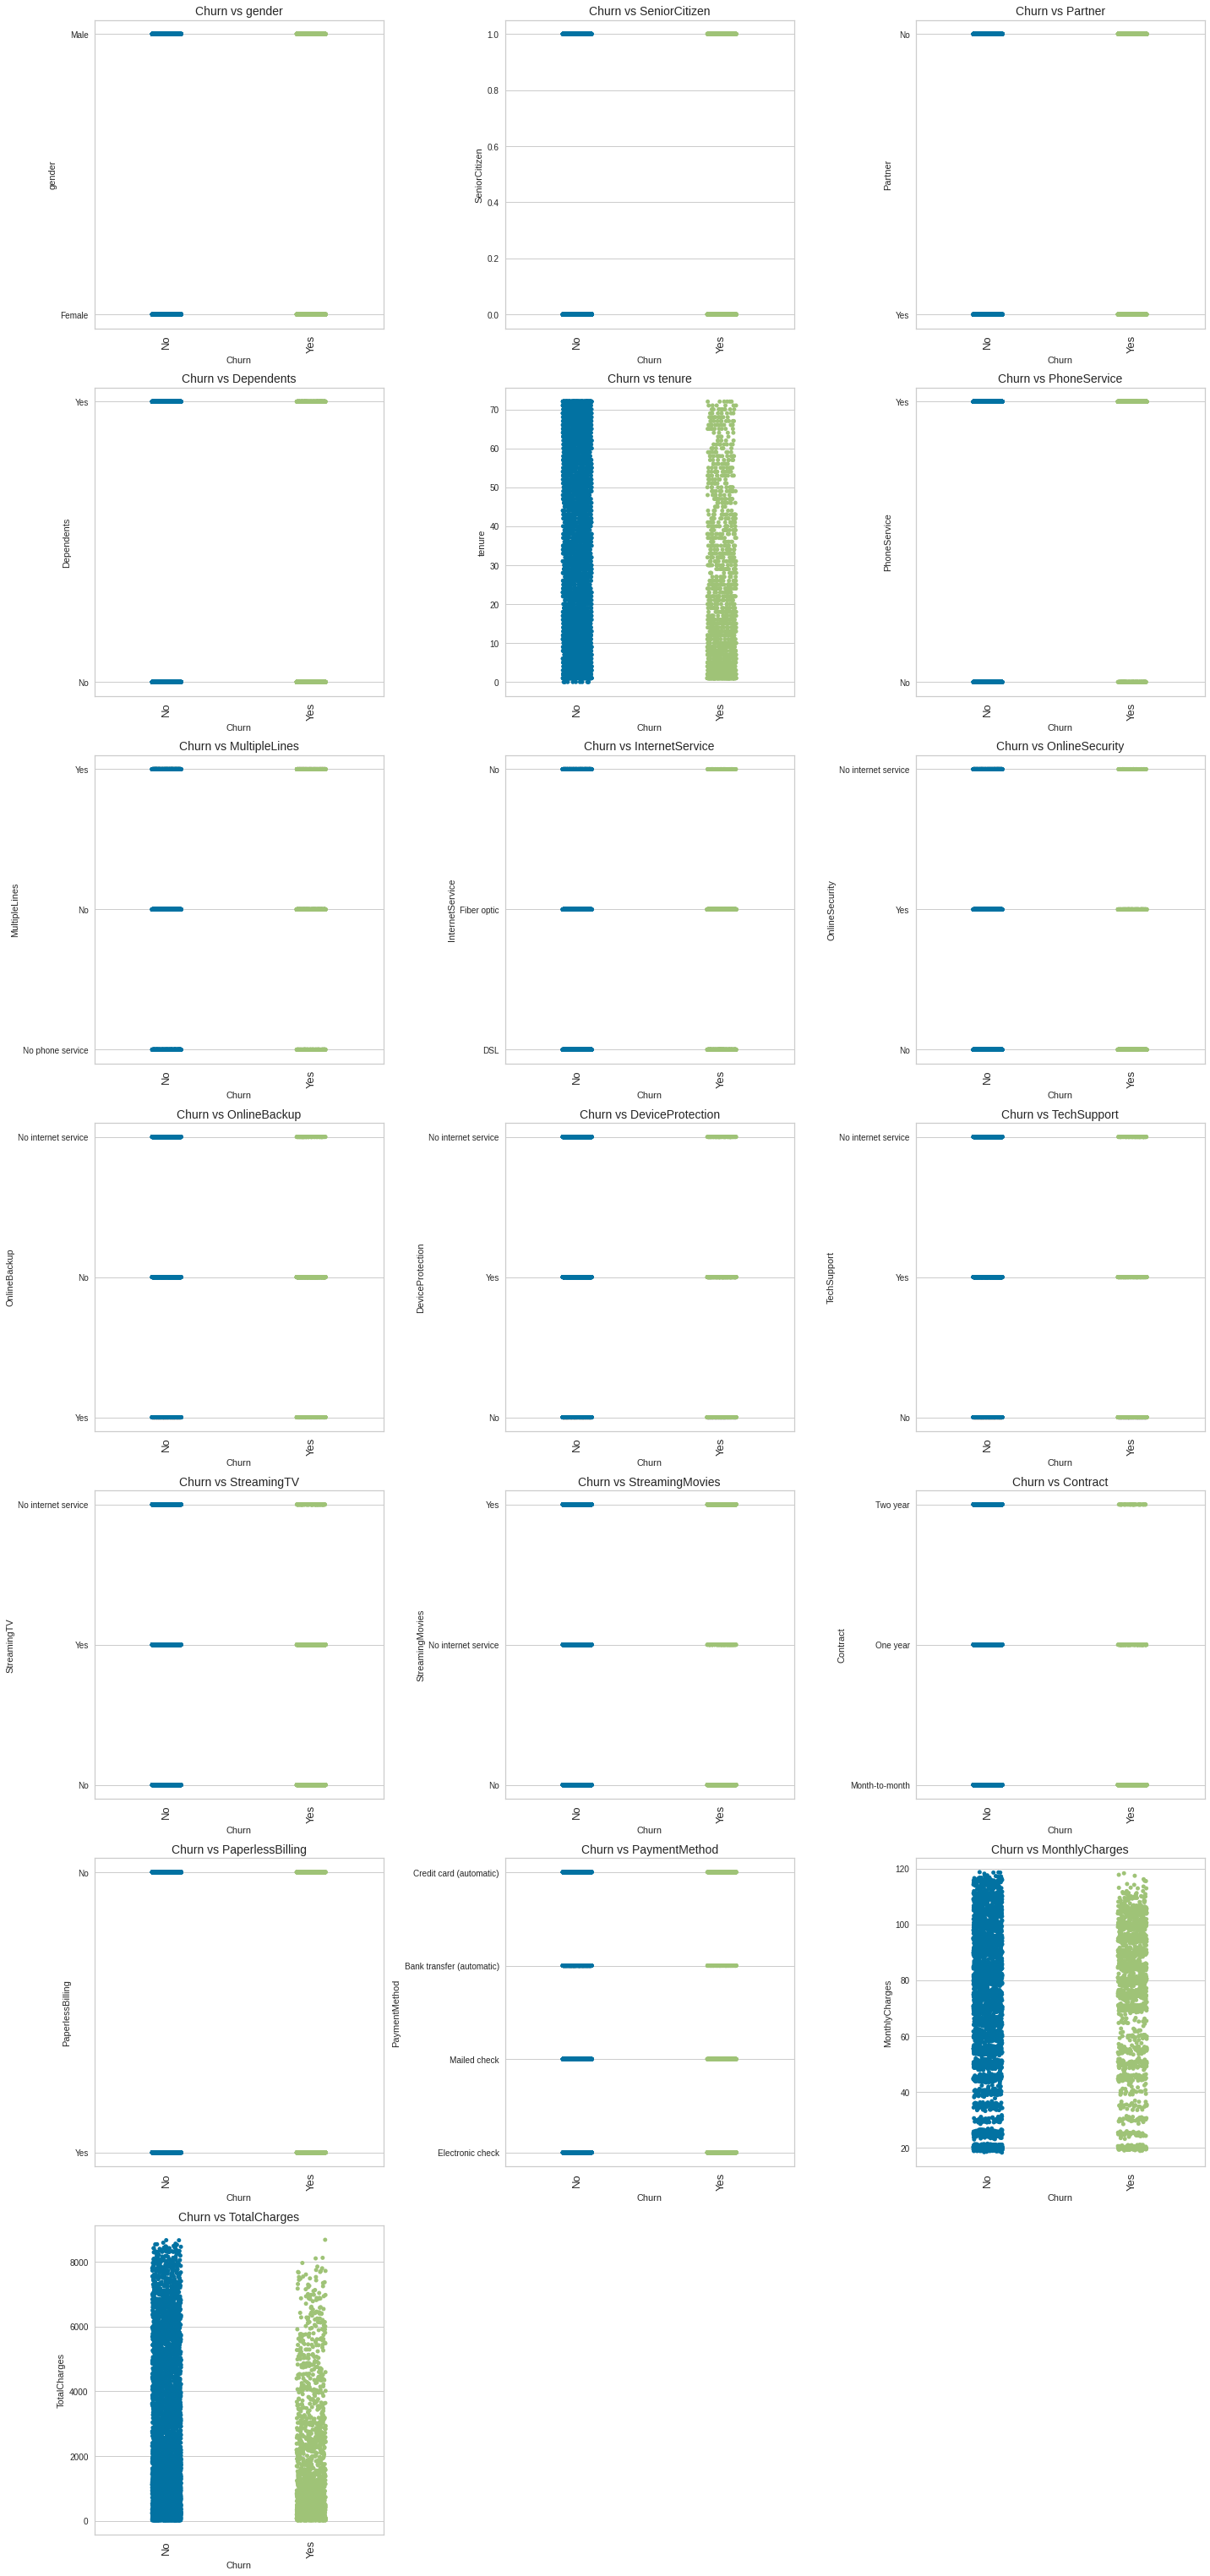

In [17]:
plt.figure(figsize=(20,60))
for i in range(len(col1)):
  plt.subplot(10,3,i+1)
  sns.stripplot(x=data['Churn'],y=data[col1[i]])
  plt.title(f"Churn vs {col1[i]}",fontsize=14)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

# Obseravtion
1-From tenure i can say no has high values and yes has less values means tenure is effecting the churn

2-From monthly charge i can say no has more values and high rate where less has less count values 

3-From totalcharges i can say no has high value as same like others means it 

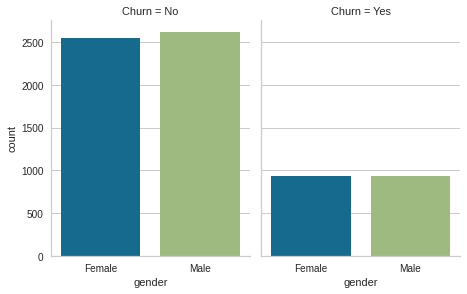

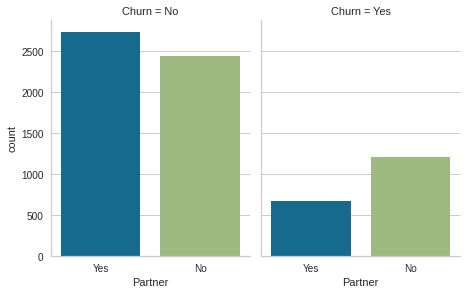

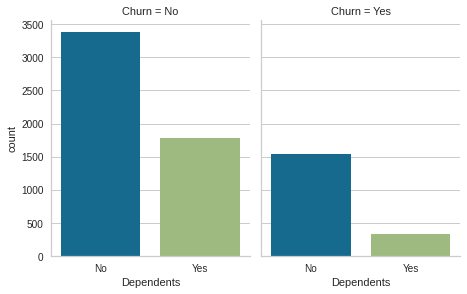

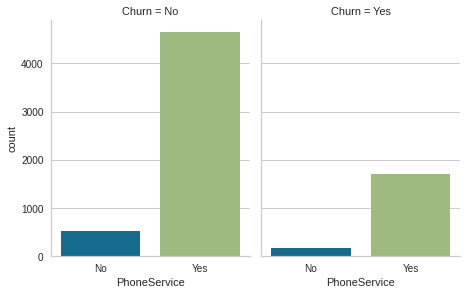

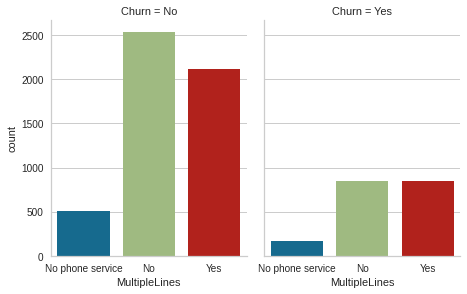

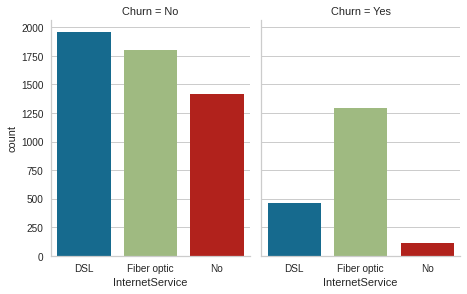

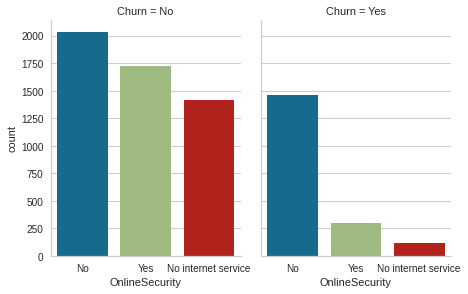

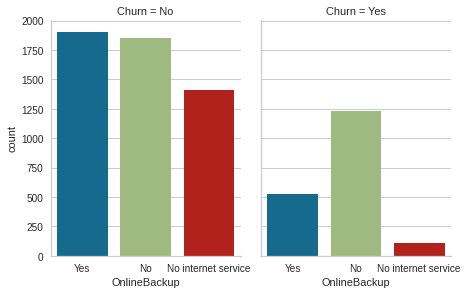

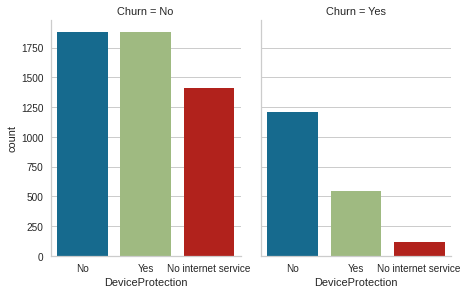

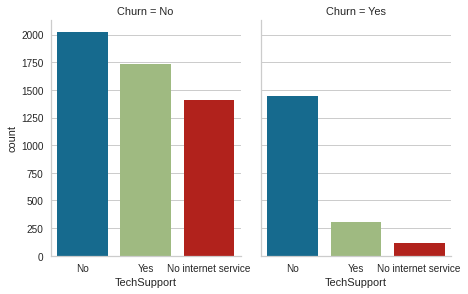

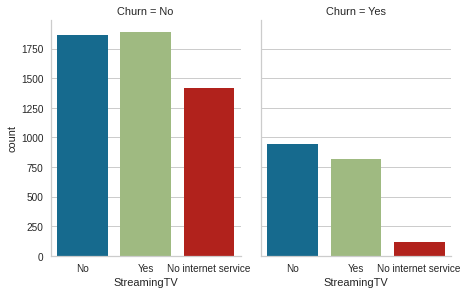

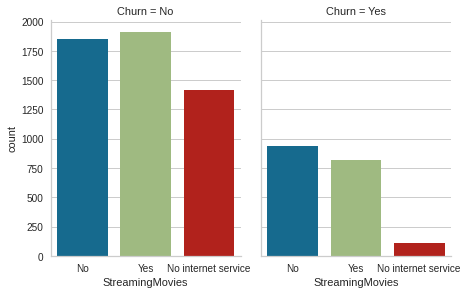

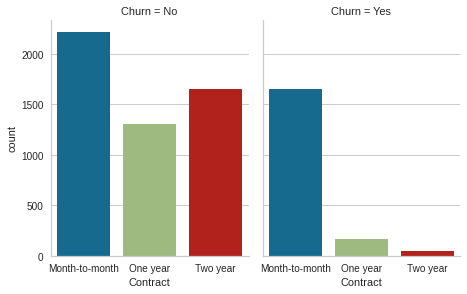

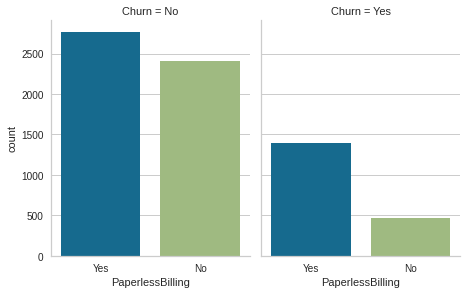

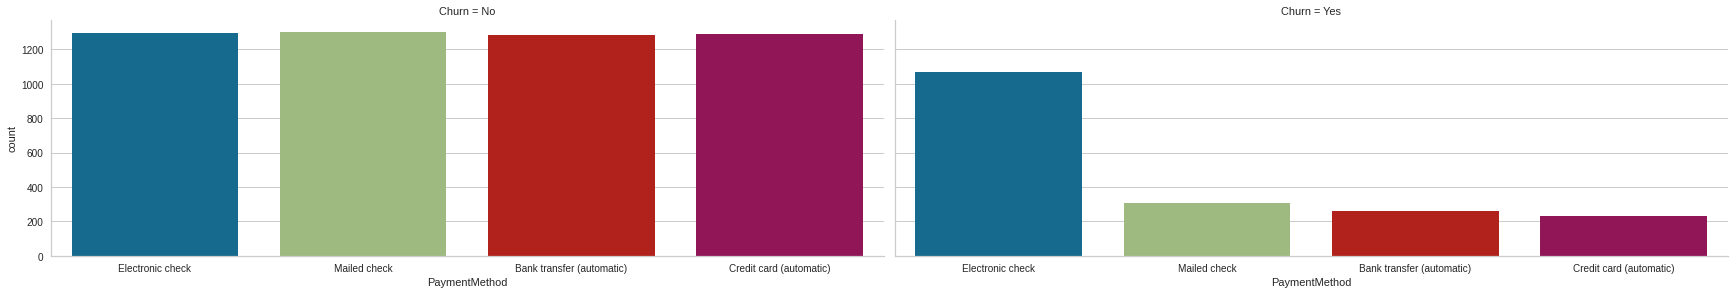

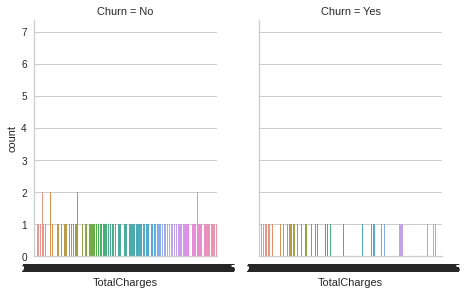

In [18]:
new_data=list(data1.columns)
new_list=new_data
new_data.remove('Churn')
for col in new_list:
  if col=='PaymentMethod':
    aspect_ratio=3.0
  else:
    aspect_ratio=0.8
  plot=sns.catplot(x=col,col='Churn',data=data,kind='count',height=4,aspect=aspect_ratio)

# Obseravtion
1-Churn has almost equal value for both gender

2-Customer with partner have less chance of leaving

3-Customer with no dependents have high chance of leaving

4-PhoneService with Yes has high chance to churn

5-From multiplelines i can say no phone service has less chance to leave and no and yes has same chance of leave

6-From internet service i can say people with fiber optic has high chance of leaving

7-People with no OnlineSecurity have high chance to leave and people with internet service has less chance to leave

8-People with online backup who dont have backup have high chance to leave and people who dont have internet service have very less chance to leave

9-From device protection i can say Who dont have deviceprotection have high chance to leave and people with no internet service have less chance to leave

10-People who dont have techsupport have high chance  and who dont have no internet service have less chance same with streaming tv and streamingMovies

11-People who have contract month-to-month have high chance to leave and people who have two year of contract have less chance to leave

12-People who use PaperlessBilling have high chance to leave and who dont use paperbilling have less chance to leave

13-People who use electroniccheck as a  paymentmethod have high chance to leave and rest of all have have less chance to leave

In [19]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [20]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.offline import iplot,init_notebook_mode
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff

In [21]:
def pieplot(df_cat,df_val,title,limit=15):
  churn=data[data['Churn']=='Yes'].groupby(df_cat)[df_val].sum().nlargest(limit).to_frame().reset_index()
  no_churn=data[data['Churn']=='No'].groupby(df_cat)[df_val].sum().nlargest(limit).to_frame().reset_index()


  
  trace1=go.Pie(labels=no_churn[df_cat],
                values=no_churn[df_val],name="No Churn",hole=.5,
                hoverinfo="label+percent+name+value",showlegend=True,
                domain={'x':[0,.48]})
  
  

  trace2=go.Pie(labels=churn[df_cat],
                values=churn[df_val],name="Churn",hole=0.5,
                hoverinfo="label+percent+name+value",showlegend=True,
                domain={'x':[0.52,1]})



  layout=dict(title=title,height=450,font=dict(size=15),
              annotations=[
                           dict(
                               x=0.20,y=0.5,
                                text="No churn",
                                showarrow=False,
                                font=dict(size=20)
                           ),
                           dict(
                               x=0.80,y=0.5,
                                text="Churn",
                                showarrow=False,
                                font=dict(size=20)
                           )
              ])
  fig=dict(data=[trace1,trace2],layout=layout)
  iplot(fig)

In [22]:
pieplot("InternetService","MonthlyCharges","Internet Service Total Charge by churn",limit=10)

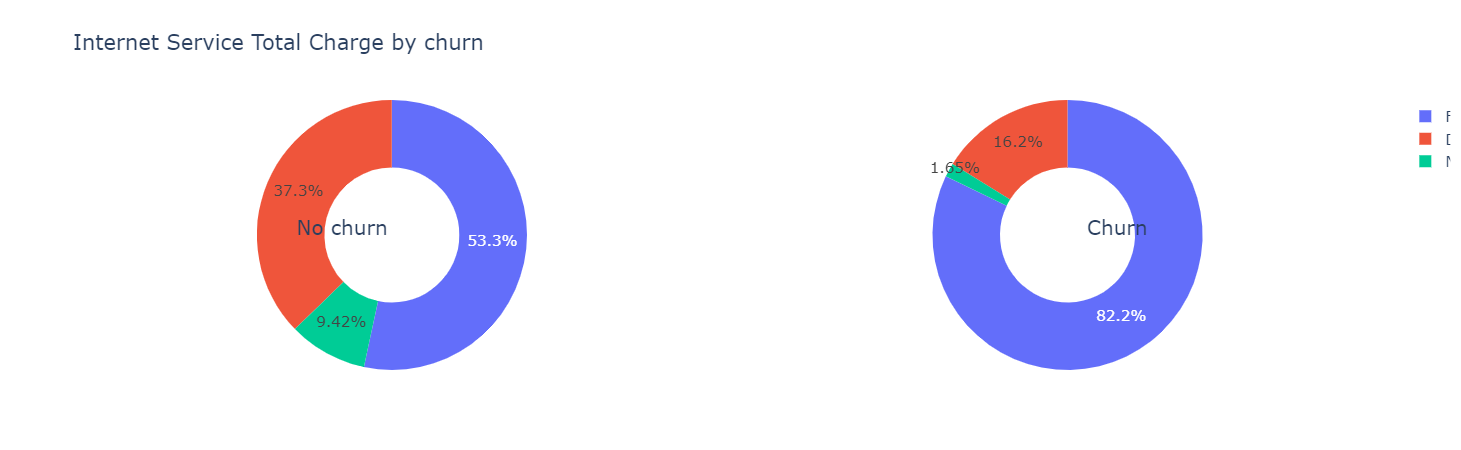

**We can see 82.2% of people churn who use fiber internet**

In [23]:
pieplot("Contract","MonthlyCharges","Type of Contract by Churn or not with Ratio of Monthly Charges",limit=10)

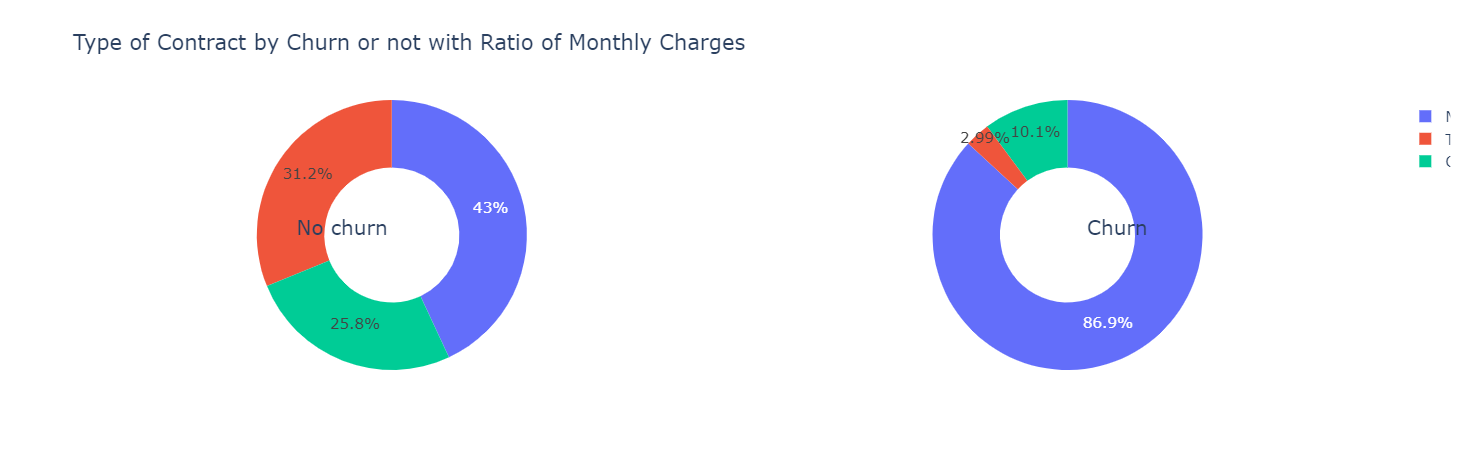

**people who churn 87% of all monthly income lost are cause by customer with month-to-month contracts**

In [24]:
pieplot("MultipleLines","MonthlyCharges","Type of Contract by Churn or not with Ratio of monthly charges",limit=10)

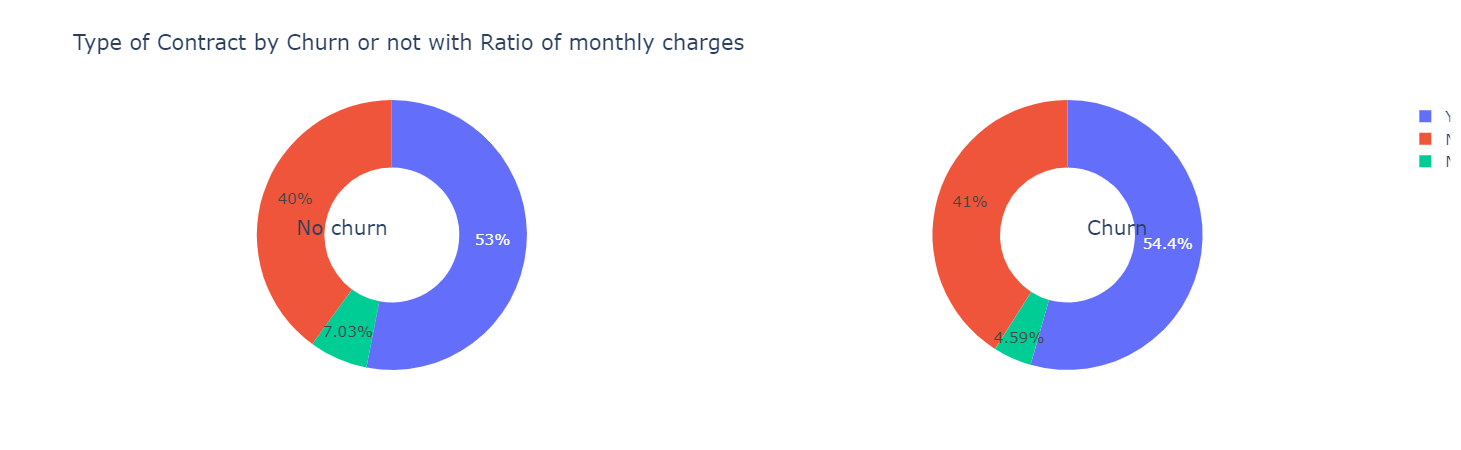

**People who churn spent there 54.4% of monthly income with multiplelines**

In [25]:
pieplot("DeviceProtection","MonthlyCharges","Types of Contract by Churn or not with ratio of Monthly Charges",limit=10)

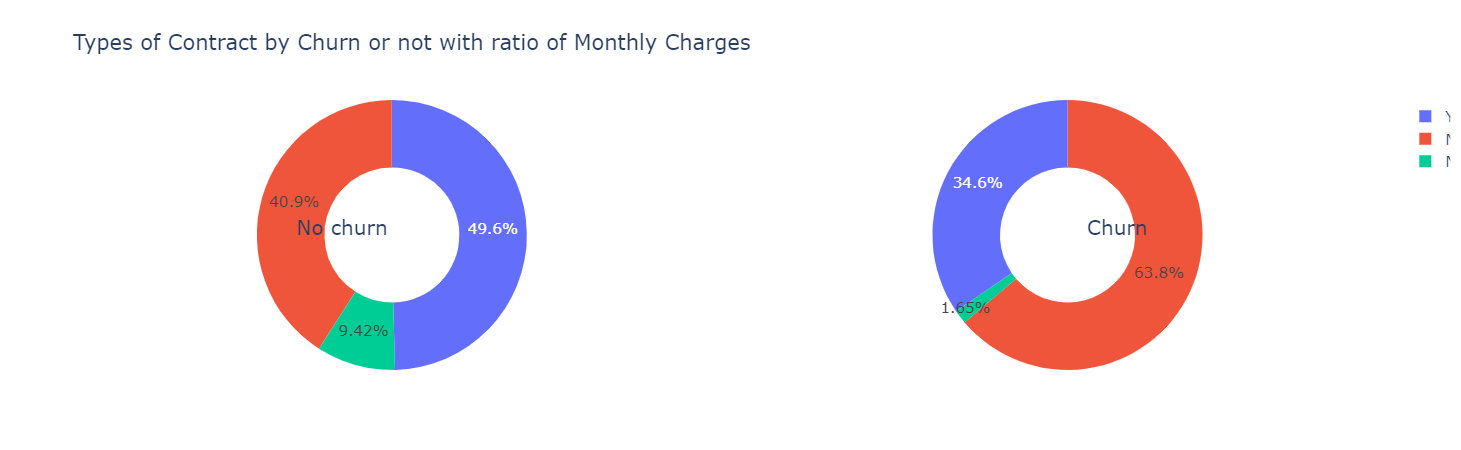

**63.8% of People Who Churn was not using deviceprotection and 34.6% of them was using it**

In [26]:
pieplot("TechSupport","MonthlyCharges","Type of Contract by Churn or not with Ratio of Monthy Charges",limit=10)

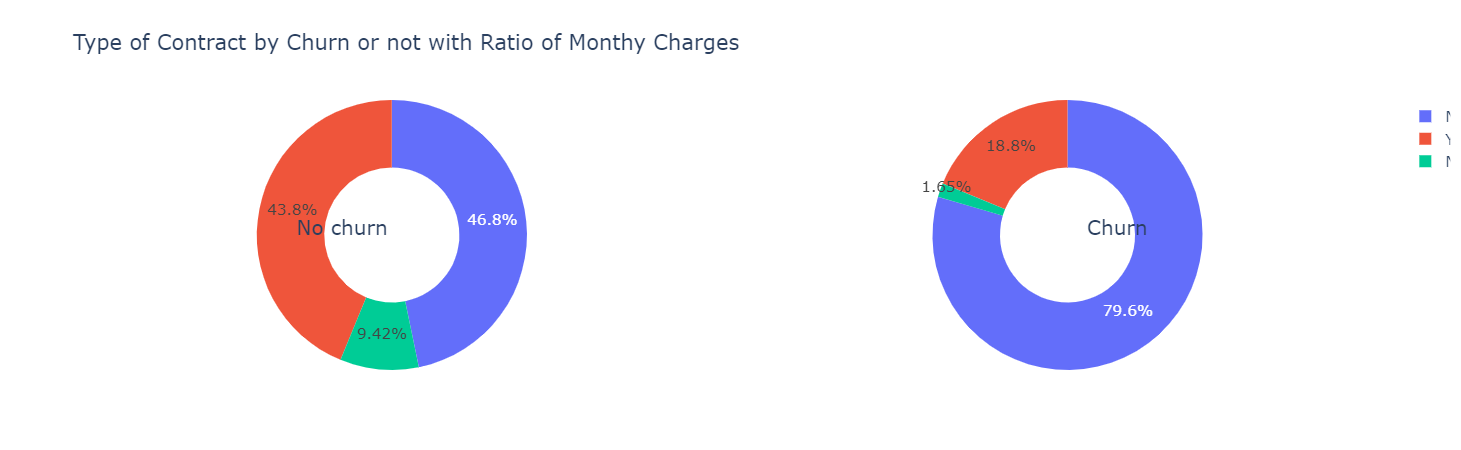

**People who churn was not getting techSupport so if people will get Tech support they might not churn**

In [27]:
pieplot("OnlineBackup","MonthlyCharges","Type of Contract by Churn or not with Ratio of Monthly Charge",limit=10)

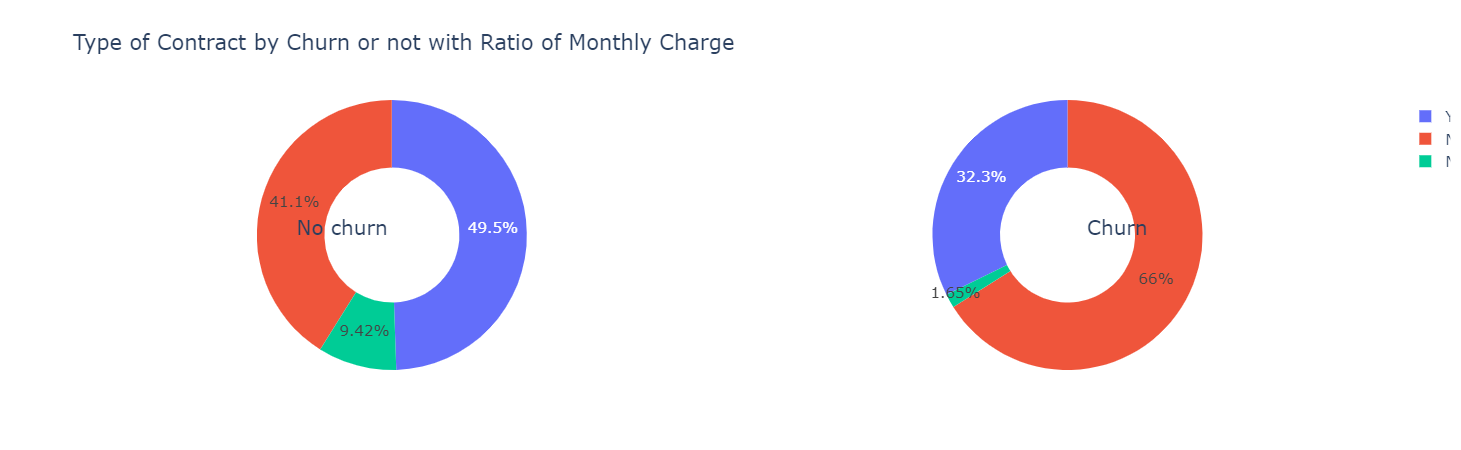

**66% People who chured was not having onlinebackup**

In [28]:
pieplot("OnlineSecurity","MonthlyCharges","Type of Contract by churn or not with Ratio of monthly charges",limit=10)

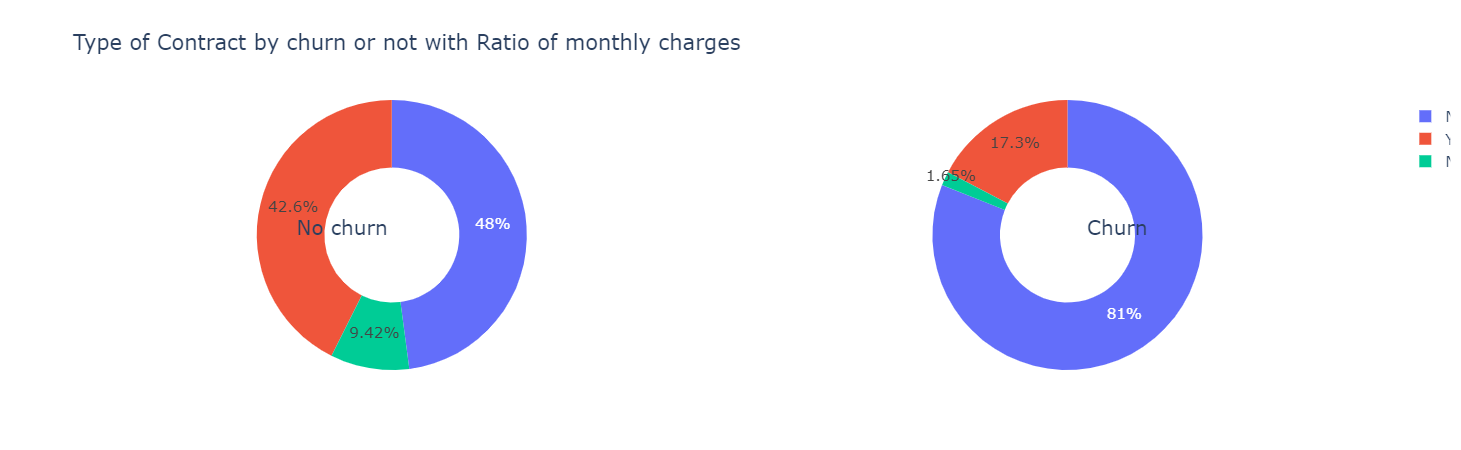

**81% People who churned was not having online security but there are still  48% people who are not having security but still they dont churn**

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [30]:
{column:len(data[column].unique()) for column in data.columns if data[column].dtypes=='object'}

{'Churn': 2,
 'Contract': 3,
 'Dependents': 2,
 'DeviceProtection': 3,
 'InternetService': 3,
 'MultipleLines': 3,
 'OnlineBackup': 3,
 'OnlineSecurity': 3,
 'PaperlessBilling': 2,
 'Partner': 2,
 'PaymentMethod': 4,
 'PhoneService': 2,
 'StreamingMovies': 3,
 'StreamingTV': 3,
 'TechSupport': 3,
 'gender': 2}

*Checking all the columns how many unique values they have so it will help me to encode them*

# Feature Encoding

In [31]:
oe=OrdinalEncoder()
def ordinal_encode(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [32]:
data=ordinal_encode(data,['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'])

# Feature Engineering

In [33]:
data['TenureRange']=pd.cut(data['tenure'],5)
data[['TenureRange','Churn']].groupby(['TenureRange'],as_index=False).mean().sort_values(by='TenureRange',ascending=True)

data.loc[ data['tenure']<=8, 'TenureCat']=0
data.loc[(data['tenure']>8) & (data['tenure']<=15),'TenureCat']=1
data.loc[(data['tenure']>15) & (data['tenure']<=30),'TenureCat']=2
data.loc[(data['tenure']>30) & (data['tenure']<=45),'TenureCat']=3
data.loc[(data['tenure']>45) & (data['tenure']<=60),'TenureCat']=4
data.loc[data['tenure']>60 ,'TenureCat']=5
data[['tenure','TenureRange','TenureCat']].head(10)

,tenure,TenureRange,TenureCat
0,1,"(-0.072, 14.4]",0.0
1,34,"(28.8, 43.2]",3.0
2,2,"(-0.072, 14.4]",0.0
3,45,"(43.2, 57.6]",3.0
4,2,"(-0.072, 14.4]",0.0
5,8,"(-0.072, 14.4]",0.0
6,22,"(14.4, 28.8]",2.0
7,10,"(-0.072, 14.4]",1.0
8,28,"(14.4, 28.8]",2.0
9,62,"(57.6, 72.0]",5.0


In [34]:
data['MonthlyChargesRange']=pd.cut(data['MonthlyCharges'],5)
data[['MonthlyChargesRange','Churn']].groupby(['MonthlyChargesRange'],as_index=False).mean().sort_values(by='MonthlyChargesRange',ascending=True)

data.loc[data['MonthlyCharges']<=20,'MonthlyChargeCat']=0
data.loc[(data['MonthlyCharges']>20) & (data['MonthlyCharges']<=40),'MonthlyChargeCat']=1
data.loc[(data['MonthlyCharges']>40) & (data['MonthlyCharges']<=60),'MonthlyChargeCat']=2
data.loc[(data['MonthlyCharges']>60) & (data['MonthlyCharges']<=80),'MonthlyChargeCat']=3
data.loc[(data['MonthlyCharges']>80) & (data['MonthlyCharges']<=100),'MonthlyChargeCat']=4
data.loc[data['MonthlyCharges']>100,'MonthlyChargeCat']=5
data[['MonthlyCharges','MonthlyChargesRange','MonthlyChargeCat']].head(10)

,MonthlyCharges,MonthlyChargesRange,MonthlyChargeCat
0,29.85,"(18.15, 38.35]",1.0
1,56.95,"(38.35, 58.45]",2.0
2,53.85,"(38.35, 58.45]",2.0
3,42.30,"(38.35, 58.45]",2.0
4,70.70,"(58.45, 78.55]",3.0
5,99.65,"(98.65, 118.75]",4.0
6,89.10,"(78.55, 98.65]",4.0
7,29.75,"(18.15, 38.35]",1.0
8,104.80,"(98.65, 118.75]",5.0
9,56.15,"(38.35, 58.45]",2.0


In [35]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureRange,TenureCat,MonthlyChargesRange,MonthlyChargeCat
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.850000,0.0,"(-0.072, 14.4]",0.0,"(18.15, 38.35]",1.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.500000,0.0,"(28.8, 43.2]",3.0,"(38.35, 58.45]",2.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.150002,1.0,"(-0.072, 14.4]",0.0,"(38.35, 58.45]",2.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.750000,0.0,"(43.2, 57.6]",3.0,"(38.35, 58.45]",2.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.649994,1.0,"(-0.072, 14.4]",0.0,"(58.45, 78.55]",3.0


In [36]:
data.drop(['MonthlyChargesRange','TenureRange'],axis=1,inplace=True)

In [37]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
TenureCat            0
MonthlyChargeCat     0
dtype: int64

*this missing value came from where i have converted the str value or empty space by nan*

In [38]:
def preprocess(df):
  df=df.copy()
  df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())
  X=df.drop(['Churn'],axis=1)
  y=df['Churn']
  return X,y

In [39]:
X,y=preprocess(data)

*Separating data between dependent variable and independent varaible*

# Multivariate Analysis

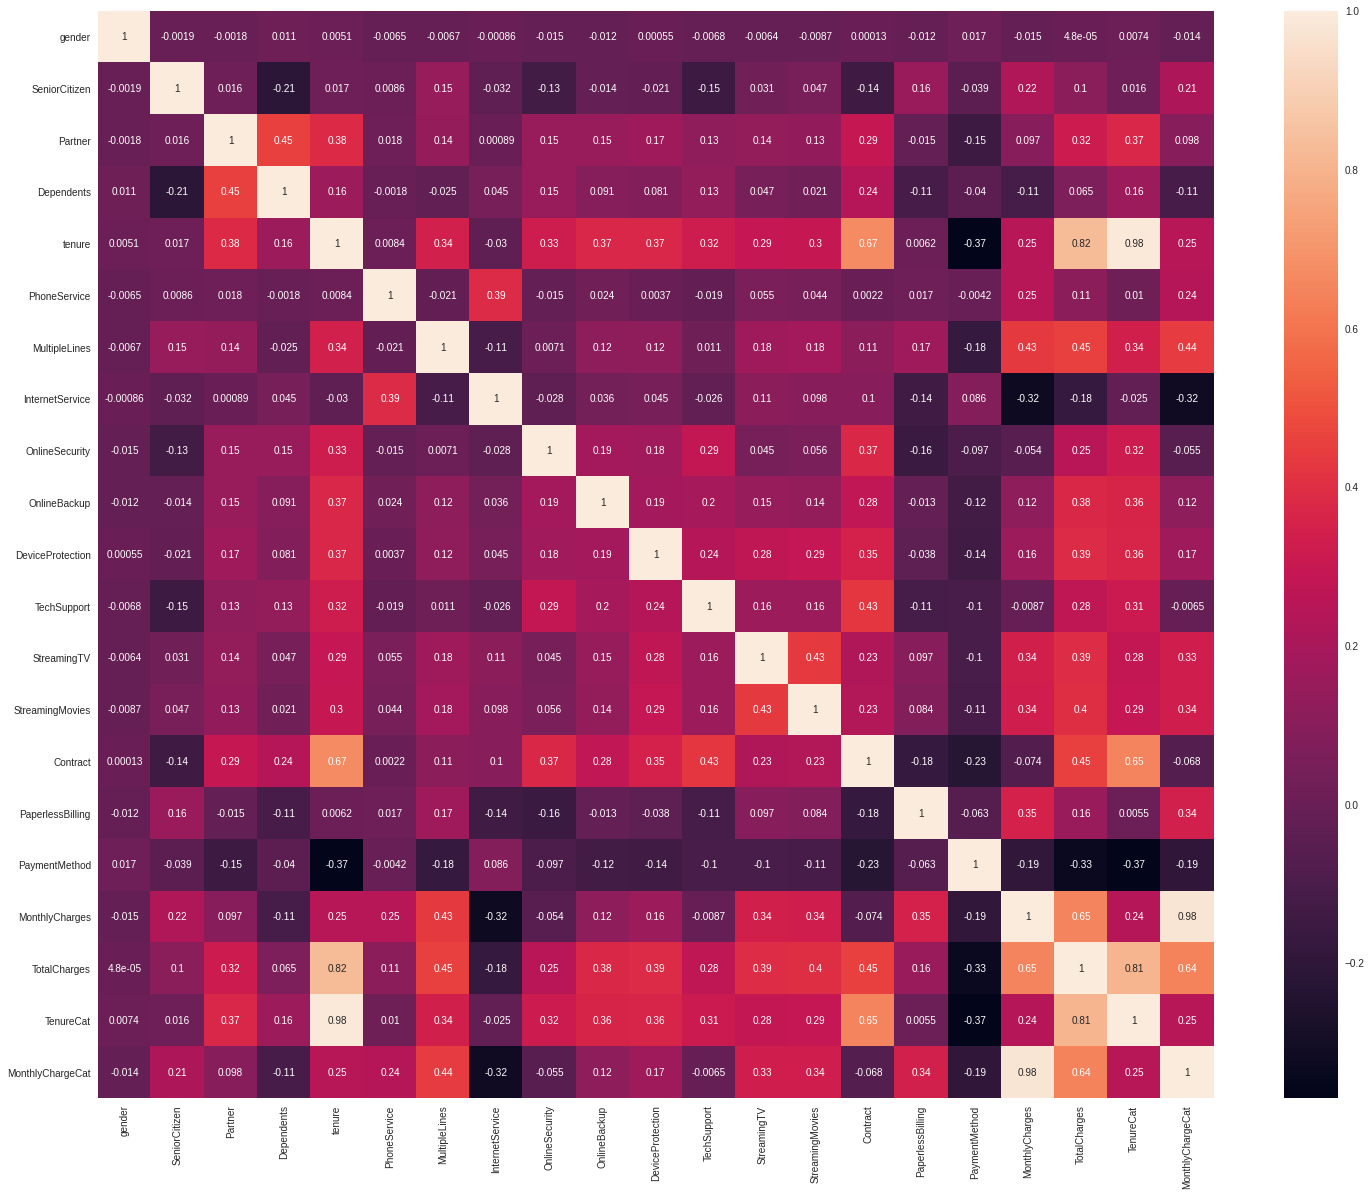

In [40]:
plt.figure(figsize=(25,20))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

**From heatmap i can say we have many columns that have good correlation but there is no columns that are having high correlation like 90% so its good that we dont have that**

In [41]:
x=X

# Checking Outliers

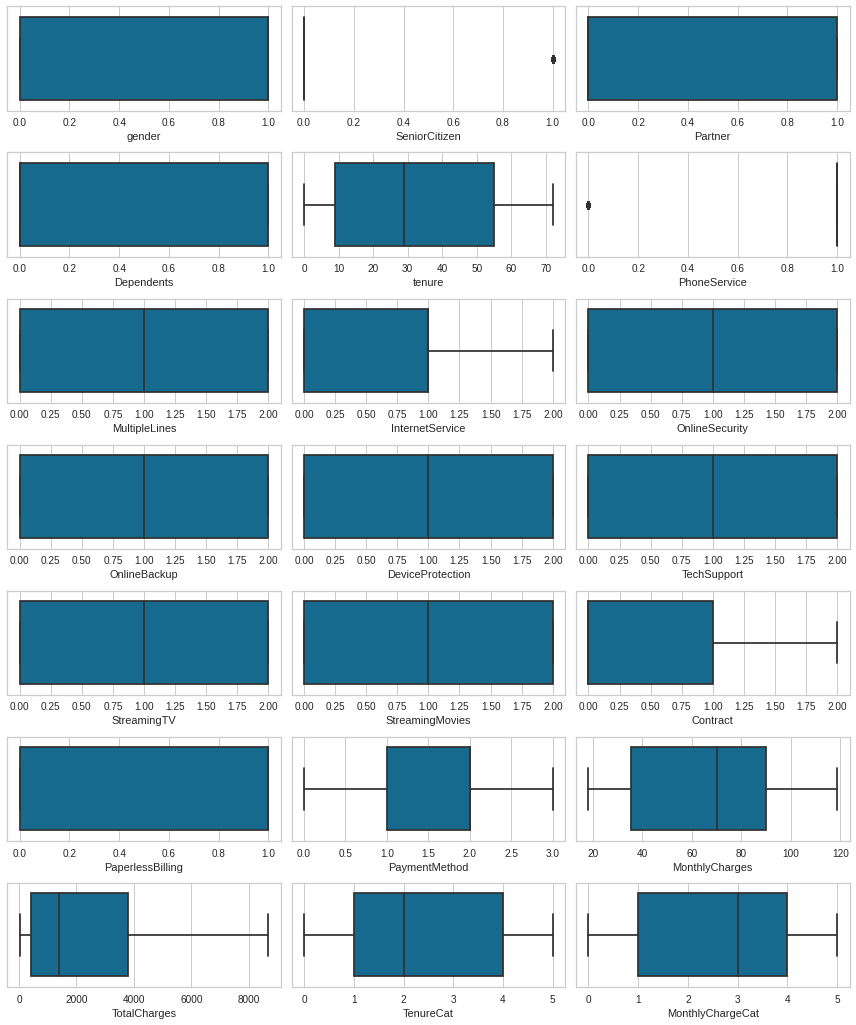

In [42]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

**There is no outliers so no need to remove them**

In [43]:
#!pip install -U imbalanced-learn

In [44]:
#!pip install lazypredict

# Balancing data

In [46]:
Ksmote=KMeansSMOTE(random_state=42)
X_res,y_res=Ksmote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Churn'])

# Checking difference between balanced data and imbalanced data

Text(0.5, 1.0, 'Balanced Data')

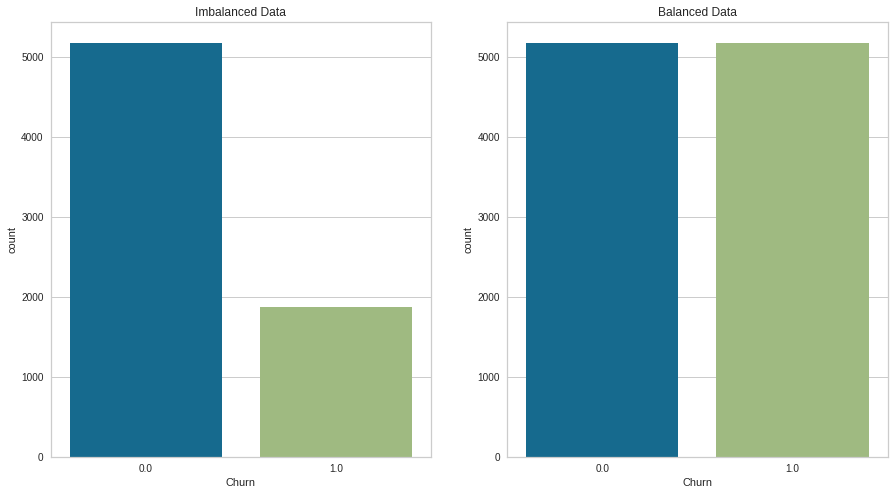

In [47]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['Churn'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Churn'])
plt.title("Balanced Data")

*Now data is balanced properly for machine learning*

# Checking skewness

In [48]:
X_new.skew()

gender              0.006187
SeniorCitizen       1.571933
Partner             0.241644
Dependents          1.094738
tenure              0.508278
PhoneService       -2.818153
MultipleLines       0.072753
InternetService     0.189872
OnlineSecurity      0.710947
OnlineBackup        0.384585
DeviceProtection    0.374154
TechSupport         0.703048
StreamingTV         0.060581
StreamingMovies     0.064034
Contract            1.097398
PaperlessBilling   -0.613613
PaymentMethod      -0.309616
MonthlyCharges     -0.431277
TotalCharges        1.116391
TenureCat           0.278961
MonthlyChargeCat   -0.425903
dtype: float64

**There is only one column totalcharges that is skewed so i am applying log transform for this so skewness will be removed and there are also columns that are skewed but these columns are categorical so no need to apply log transform on that we have to apply log transform on continuous feature only**

In [49]:
X_new['TotalCharges']=np.log1p(X_new['TotalCharges'])

# Feature Scaling

In [50]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

**Spliting data into train and test using 30% data for testing**

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [52]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Training Multiple Models

In [53]:
models={
    "ExtraTrees  Classifier":ExtraTreesClassifier(),
    "RandomForest  Classifier":RandomForestClassifier(),
    "Logistic  Regression":LogisticRegression(),
    "DecisionTree  Classifier":DecisionTreeClassifier(),
    "XGB  Classifier":XGBClassifier(),
    "LGBM  Classifier":LGBMClassifier()
}

 _____      _            _____                    
| ____|_  _| |_ _ __ __ |_   _| __ ___  ___  ___  
|  _| \ \/ / __| '__/ _` || || '__/ _ \/ _ \/ __| 
| |___ >  <| |_| | | (_| || || | |  __/  __/\__ \ 
|_____/_/\_\\__|_|  \__,_||_||_|  \___|\___||___/ 
                                                  
  ____ _               _  __ _           
 / ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
| |   | |/ _` / __/ __| | |_| |/ _ \ '__|
| |___| | (_| \__ \__ \ |  _| |  __/ |   
 \____|_|\__,_|___/___/_|_| |_|\___|_|   
                                         

ACCURACY SCORE 0.8595813204508856


Cross Val Score 85.60077182556368


Confusion metrics
[[1399  175]
 [ 261 1270]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1574
         1.0       0.88      0.83      0.85      1531

   micro avg       0.86      0.86      0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86     

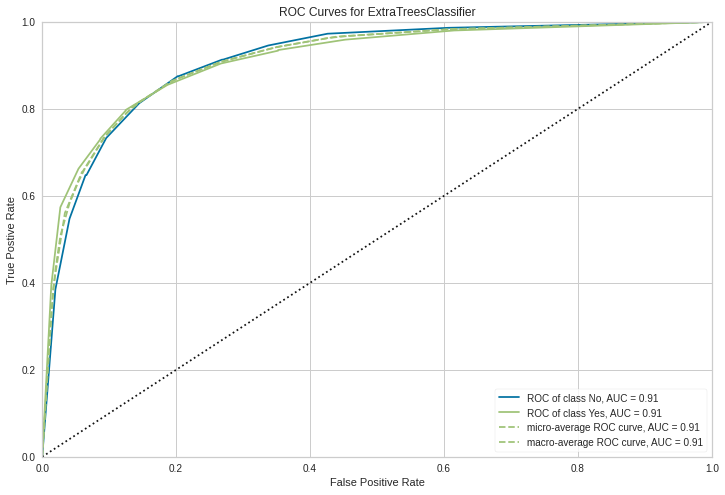

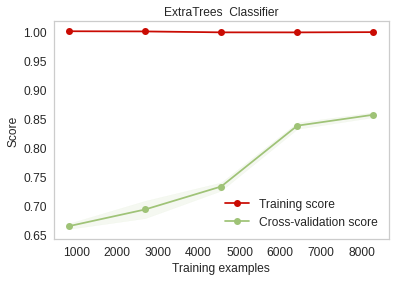

 ____                 _                 _____                   _    
|  _ \ __ _ _ __   __| | ___  _ __ ___ |  ___|__  _ __ ___  ___| |_  
| |_) / _` | '_ \ / _` |/ _ \| '_ ` _ \| |_ / _ \| '__/ _ \/ __| __| 
|  _ < (_| | | | | (_| | (_) | | | | | |  _| (_) | | |  __/\__ \ |_  
|_| \_\__,_|_| |_|\__,_|\___/|_| |_| |_|_|  \___/|_|  \___||___/\__| 
                                                                     
  ____ _               _  __ _           
 / ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
| |   | |/ _` / __/ __| | |_| |/ _ \ '__|
| |___| | (_| \__ \__ \ |  _| |  __/ |   
 \____|_|\__,_|___/___/_|_| |_|\___|_|   
                                         

ACCURACY SCORE 0.8505636070853462


Cross Val Score 85.20496360459357


Confusion metrics
[[1399  175]
 [ 289 1242]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1574
         1.0       0.88      0.81      0.84      1531

   micro avg       0.8

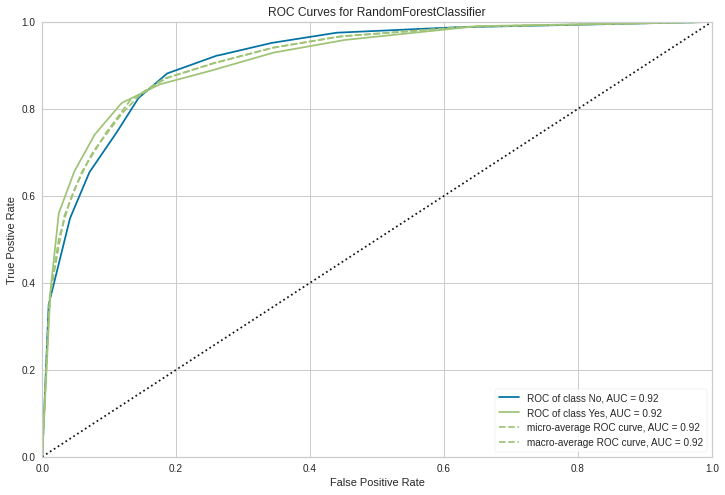

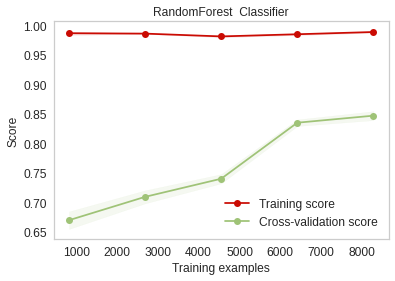

 _                _     _   _       
| |    ___   __ _(_)___| |_(_) ___  
| |   / _ \ / _` | / __| __| |/ __| 
| |__| (_) | (_| | \__ \ |_| | (__  
|_____\___/ \__, |_|___/\__|_|\___| 
            |___/                   
 ____                              _             
|  _ \ ___  __ _ _ __ ___  ___ ___(_) ___  _ __  
| |_) / _ \/ _` | '__/ _ \/ __/ __| |/ _ \| '_ \ 
|  _ <  __/ (_| | | |  __/\__ \__ \ | (_) | | | |
|_| \_\___|\__, |_|  \___||___/___/_|\___/|_| |_|
           |___/                                 

ACCURACY SCORE 0.778743961352657


Cross Val Score 77.06798792737737


Confusion metrics
[[1166  408]
 [ 279 1252]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      1574
         1.0       0.75      0.82      0.78      1531

   micro avg       0.78      0.78      0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



Roc Auc 

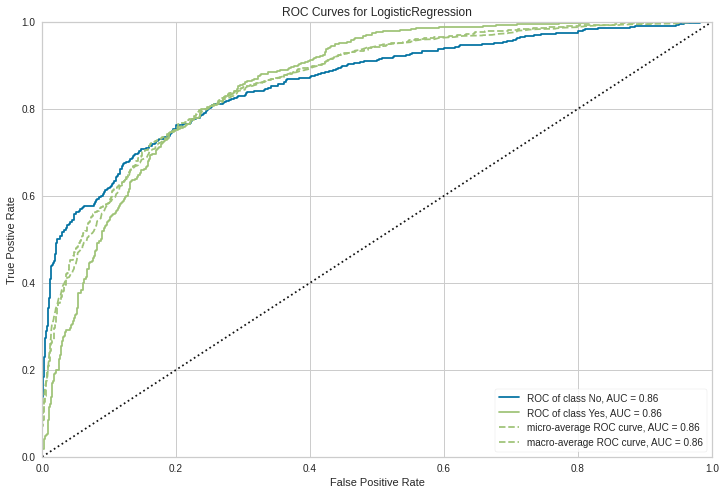

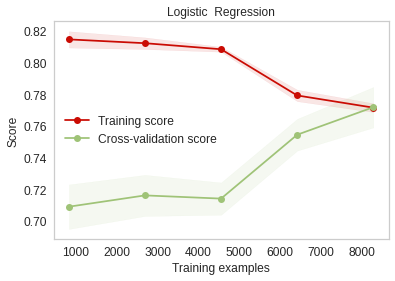

 ____            _     _           _____               
|  _ \  ___  ___(_)___(_) ___  _ _|_   _| __ ___  ___  
| | | |/ _ \/ __| / __| |/ _ \| '_ \| || '__/ _ \/ _ \ 
| |_| |  __/ (__| \__ \ | (_) | | | | || | |  __/  __/ 
|____/ \___|\___|_|___/_|\___/|_| |_|_||_|  \___|\___| 
                                                       
  ____ _               _  __ _           
 / ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
| |   | |/ _` / __/ __| | |_| |/ _ \ '__|
| |___| | (_| \__ \__ \ |  _| |  __/ |   
 \____|_|\__,_|___/___/_|_| |_|\___|_|   
                                         

ACCURACY SCORE 0.8045088566827697


Cross Val Score 80.92375185714687


Confusion metrics
[[1260  314]
 [ 293 1238]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1574
         1.0       0.80      0.81      0.80      1531

   micro avg       0.80      0.80      0.80      3105
   macro avg       0.80      0.80      0.80      310

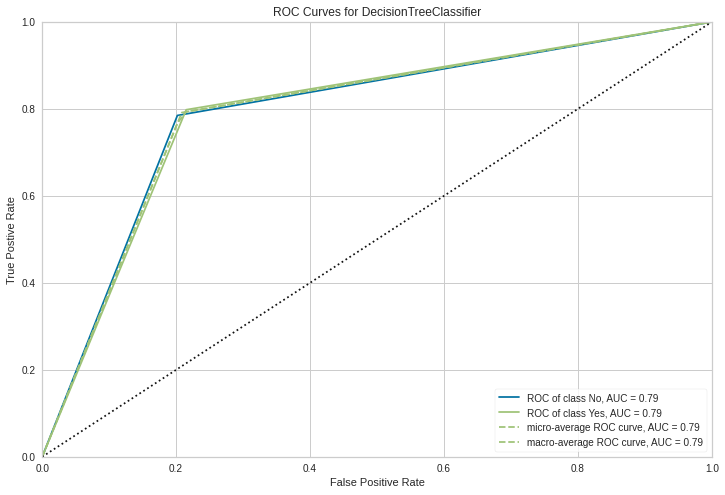

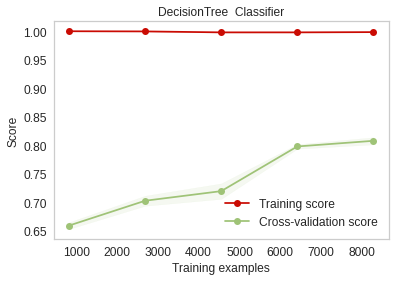

__  ______ ____      ____ _               _  __ _           
\ \/ / ___| __ )    / ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
 \  / |  _|  _ \   | |   | |/ _` / __/ __| | |_| |/ _ \ '__|
 /  \ |_| | |_) |  | |___| | (_| \__ \__ \ |  _| |  __/ |   
/_/\_\____|____/    \____|_|\__,_|___/___/_|_| |_|\___|_|   
                                                            

ACCURACY SCORE 0.8618357487922705


Cross Val Score 85.80396938861324


Confusion metrics
[[1357  217]
 [ 212 1319]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1574
         1.0       0.86      0.86      0.86      1531

   micro avg       0.86      0.86      0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



Roc Auc Curve
Model Learning Curve


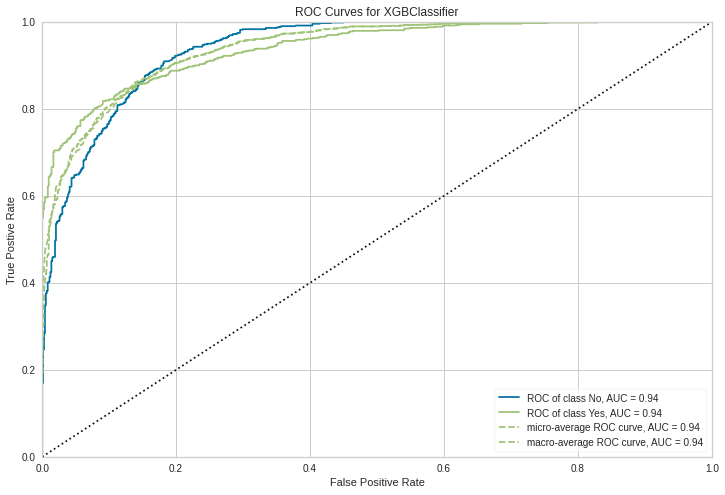

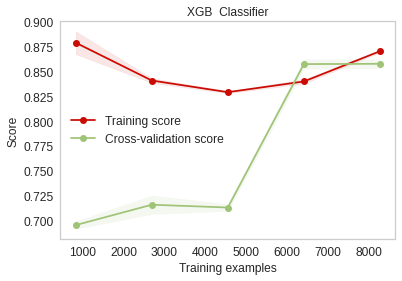

 _     ____ ____  __  __     ____ _               _  __ _           
| |   / ___| __ )|  \/  |   / ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
| |  | |  _|  _ \| |\/| |  | |   | |/ _` / __/ __| | |_| |/ _ \ '__|
| |__| |_| | |_) | |  | |  | |___| | (_| \__ \__ \ |  _| |  __/ |   
|_____\____|____/|_|  |_|   \____|_|\__,_|___/___/_|_| |_|\___|_|   
                                                                    

ACCURACY SCORE 0.8573268921095009


Cross Val Score 85.94918659303488


Confusion metrics
[[1385  189]
 [ 254 1277]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1574
         1.0       0.87      0.83      0.85      1531

   micro avg       0.86      0.86      0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



Roc Auc Curve
Model Learning Curve


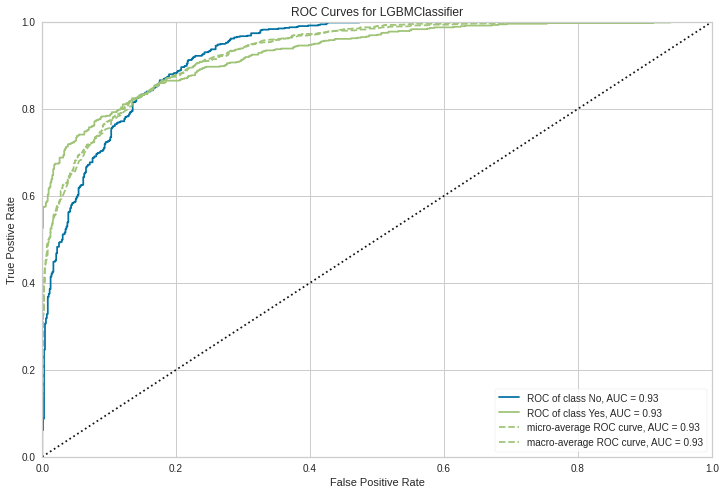

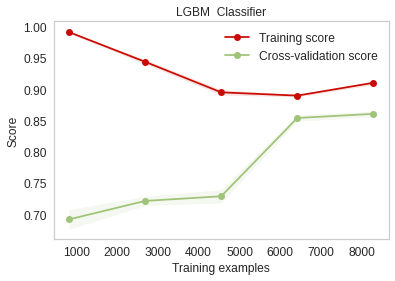

In [54]:
NAME=[]
CVS=[]
ACCURACY_SCORE=[]
skf=StratifiedKFold(n_splits=5,shuffle=True)
for name,model in models.items():
  NAME.append(name)
  font=pyfiglet.figlet_format(name)
  print(font)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  ACCURACY_SCORE.append(accuracy)
  print("ACCURACY SCORE",accuracy)
  cvs=cross_val_score(model,X_new,y_new,scoring='accuracy',cv=skf).mean()
  CVS.append(cvs)
  print("\n")
  print("Cross Val Score",cvs*100)
  cm=confusion_matrix(y_test,y_pred)
  print("\n")
  print("Confusion metrics")
  print(cm)
  report=classification_report(y_test,y_pred)
  print("\n")
  print("Classification Report")
  print(report)
  print("\n")
  print("Roc Auc Curve")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=["No","Yes"],micro=True,macro=True)
  print("Model Learning Curve")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

**I will select LightGBM because it is giving me good metrics results**

In [55]:
lgb=LGBMClassifier()

# Hyperparameter tuning

In [56]:
params={'boosting_type': ['gbdt','dart','goss'],
 'importance_type': ['split','gain'],
 'max_depth': [-1,None,1,2,3],
 'n_estimators': [100,200,500]
}

In [57]:
Grid=GridSearchCV(estimator=lgb,param_grid=params,scoring='accuracy',n_jobs=-1,cv=skf)

In [58]:
Grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'boosting_type': ['gbdt', 'dart', 'goss'], 'importance_type': ['split', 'gain'], 'max_depth': [-1, None, 1, 2, 3], 'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
Grid.best_params_

{'boosting_type': 'goss',
 'importance_type': 'split',
 'max_depth': 2,
 'n_estimators': 500}

In [60]:
Grid.best_score_

0.8631619636644762

**Accuracy increased from 86.01 to 86.20**

In [61]:
light=LGBMClassifier(boosting_type= 'dart',
 importance_type= 'split',
 max_depth= 3,
 n_estimators= 500)

# Final Model learning Curve

Roc Auc Curve
Model Learning Curve


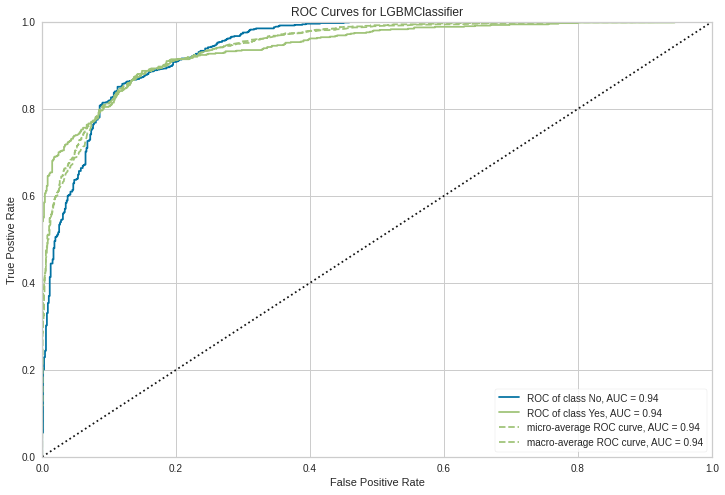

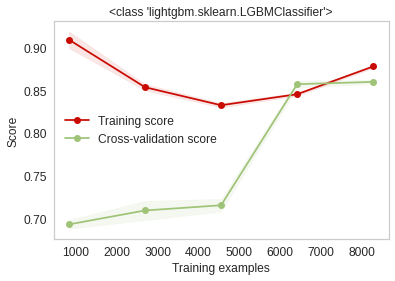

In [62]:
print("Roc Auc Curve")
plt.figure(figsize=(12,8))
roc_auc(light,X_train,y_train,X_test=X_test,y_test=y_test,classes=["No","Yes"],micro=True,macro=True)
print("Model Learning Curve")
skplt.estimators.plot_learning_curve(light,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=LGBMClassifier)
plt.show()

# Final Model metrics

In [63]:
light.fit(X_train,y_train)
y_prediction=light.predict(X_test)

In [64]:
print("Accurcay Score",accuracy_score(y_test,y_prediction))
font1=pyfiglet.figlet_format("Confusion Metrics")
print(font1)
print(confusion_matrix(y_test,y_prediction))
font2=pyfiglet.figlet_format("Classification Report")
print(font2)
print(classification_report(y_test,y_prediction))

Accurcay Score 0.8621578099838969
  ____             __           _             
 / ___|___  _ __  / _|_   _ ___(_) ___  _ __  
| |   / _ \| '_ \| |_| | | / __| |/ _ \| '_ \ 
| |__| (_) | | | |  _| |_| \__ \ | (_) | | | |
 \____\___/|_| |_|_|  \__,_|___/_|\___/|_| |_|
                                              
 __  __      _        _          
|  \/  | ___| |_ _ __(_) ___ ___ 
| |\/| |/ _ \ __| '__| |/ __/ __|
| |  | |  __/ |_| |  | | (__\__ \
|_|  |_|\___|\__|_|  |_|\___|___/
                                 

[[1383  191]
 [ 237 1294]]
  ____ _               _  __ _           _   _             
 / ___| | __ _ ___ ___(_)/ _(_) ___ __ _| |_(_) ___  _ __  
| |   | |/ _` / __/ __| | |_| |/ __/ _` | __| |/ _ \| '_ \ 
| |___| | (_| \__ \__ \ |  _| | (_| (_| | |_| | (_) | | | |
 \____|_|\__,_|___/___/_|_| |_|\___\__,_|\__|_|\___/|_| |_|
                                                           
 ____                       _   
|  _ \ ___ _ __   ___  _ __| |_ 
| |_) / _ \ '_ \ / _ \| '_

In [65]:
import joblib
joblib.dump(Grid,"Churn_Prediction.obj")

['Churn_Prediction.obj']

In [66]:
model=joblib.load('/content/Churn_Prediction.obj')

In [67]:
model.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

# Conclusion
1-After doing eda i can say for gender churn is equal we cant say female is leaving more or male both are same for churn

2-we can only select those who have partner because they have less chance to leave

3-and we can select only people who have dependents so they will have less chance of leaving

4-if people will have online security and backup they will not leave 

5-if people will have techsupport they will not leave

6-same with if people use paperlessbilling and electroniccheck they have high chance to leave and people who have contract month-to-month they have a very high chance to leave

7-so if we have a data of customers so we can already know who will stay and who will leave if someone will leave we can provide them these services so there chance of leaving will get reduced